Using the HR Analytics dataset, we aim to Predict whether an employee will be promoted or not using historical data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [7]:
data.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0


In [8]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
data['previous_year_rating'].value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [10]:
data['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [11]:
data['previous_year_rating'] = data['previous_year_rating'].fillna(0)

In [46]:
data['education'] = data['education'].fillna("Bachelor's")

KeyError: 'education'

In [16]:
data['education'].value_counts()

education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [17]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [18]:
data.drop('employee_id', axis=1, inplace=True)

In [19]:
data = pd.get_dummies(data, columns=['department', 'education'], drop_first=True)

<Axes: ylabel='avg_training_score'>

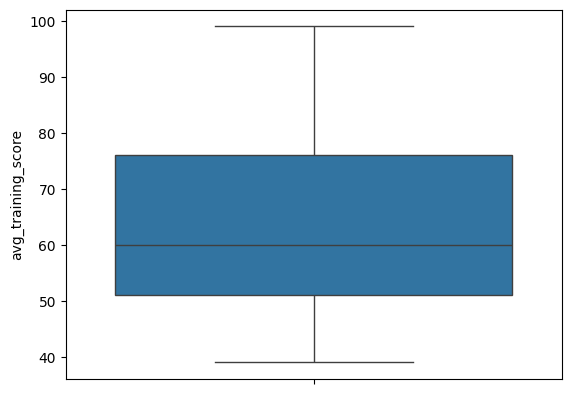

In [21]:
sns.boxplot(data['avg_training_score'])

<Axes: >

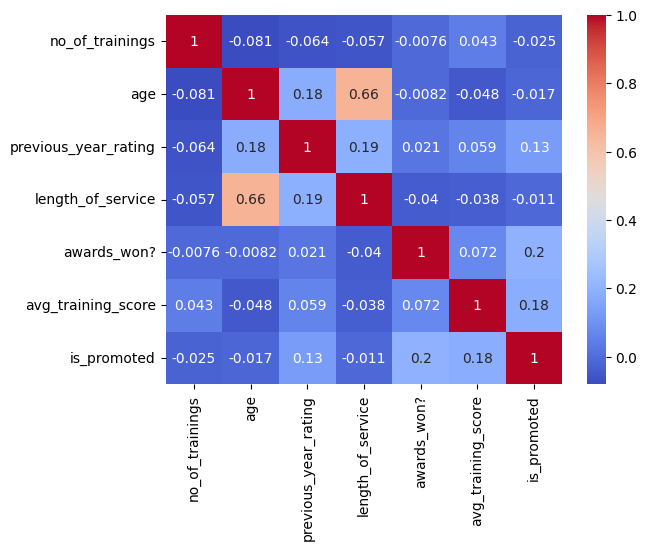

In [22]:
numerics = data.select_dtypes(include = ['int64', 'float64'])
corr = numerics.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [23]:
data['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [27]:
data = pd.get_dummies(data, columns=['region'], drop_first=True)

In [32]:
data = pd.get_dummies(data, columns=['gender', 'recruitment_channel'], drop_first=True)

In [33]:
from sklearn.model_selection import train_test_split

X = data.drop('is_promoted', axis=1)
y = data['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               54808 non-null  int64  
 1   age                           54808 non-null  int64  
 2   previous_year_rating          54808 non-null  float64
 3   length_of_service             54808 non-null  int64  
 4   awards_won?                   54808 non-null  int64  
 5   avg_training_score            54808 non-null  int64  
 6   is_promoted                   54808 non-null  int64  
 7   department_Finance            54808 non-null  bool   
 8   department_HR                 54808 non-null  bool   
 9   department_Legal              54808 non-null  bool   
 10  department_Operations         54808 non-null  bool   
 11  department_Procurement        54808 non-null  bool   
 12  department_R&D                54808 non-null  bool   
 13  d

In [35]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10055
           1       0.36      0.40      0.38       907

    accuracy                           0.89     10962
   macro avg       0.65      0.67      0.66     10962
weighted avg       0.90      0.89      0.89     10962



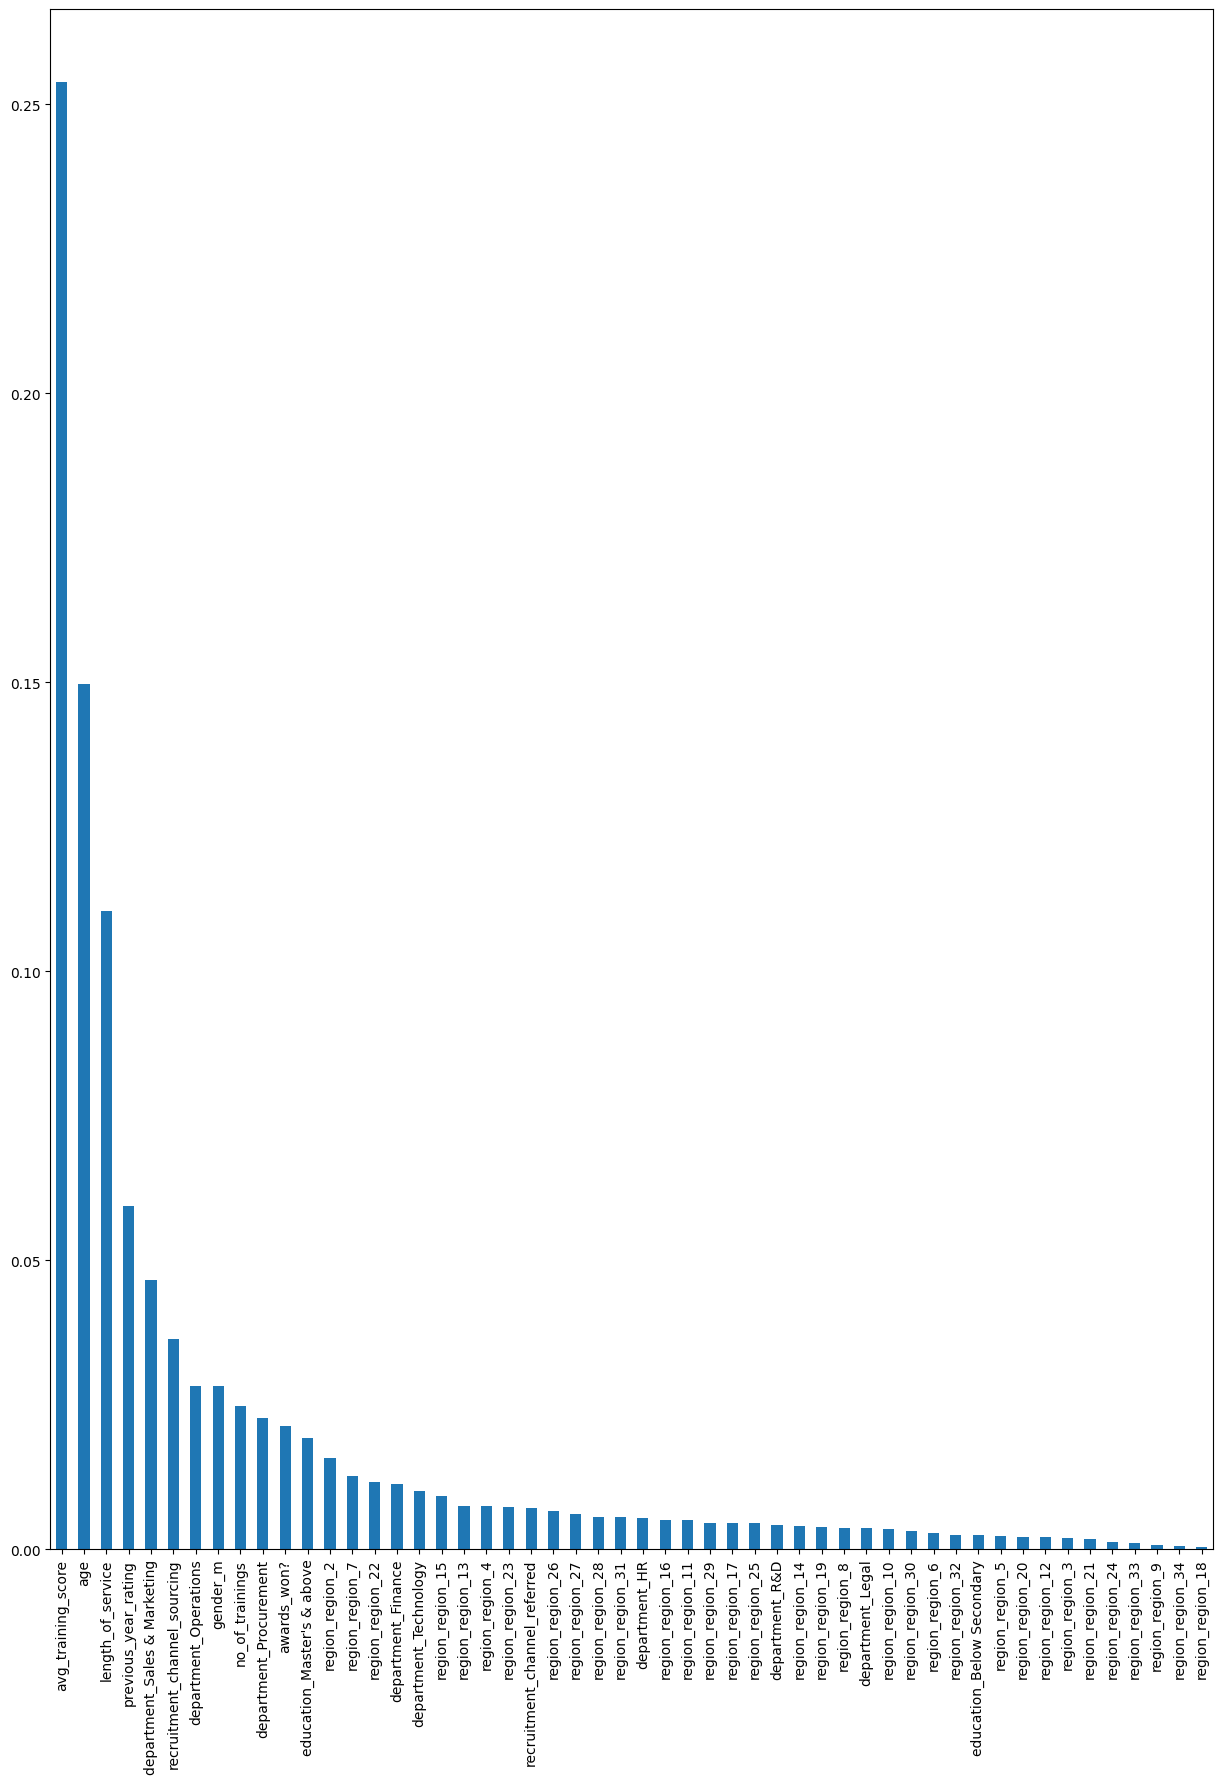

In [42]:
plt.figure(figsize=(15,20))
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [43]:
import joblib
joblib.dump(model, 'HR_PROMOTION_PREDICTOR.pkl')

['HR_PROMOTION_PREDICTOR.pkl']

In [44]:
Promotion_Predictor = joblib.load('HR_PROMOTION_PREDICTOR.pkl')

In [45]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [47]:
test['previous_year_rating'] = test['previous_year_rating'].fillna(0)


In [48]:
test['education'].value_counts()

education
Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: count, dtype: int64

In [50]:
test['education'] = test['education'].fillna("Bachelor's")

In [52]:
categoricals = test.select_dtypes(include=['object']).columns.to_list()
test = pd.get_dummies(test, columns=categoricals, drop_first=True)

In [54]:
test.drop(columns=['employee_id'], inplace=True)

In [56]:
test = test[X_train.columns]  


In [57]:
test.reset_index(drop=True, inplace=True)


In [58]:
predictions = model.predict(test)

In [59]:
test['promotion_prediction'] = predictions
test.to_csv('output_with_predictions.csv', index=False)

C:\Users\91770\AppData\Local\Temp\ipykernel_5312\2608295589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['promotion_prediction'] = predictions


In [60]:
test.head(3)

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,...,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,promotion_prediction
0,1,24,0.0,1,0,77,False,False,False,False,...,False,False,False,False,False,False,True,False,True,0
1,1,31,3.0,5,0,51,False,True,False,False,...,True,False,False,False,False,False,False,False,False,0
2,1,31,1.0,4,0,47,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
